In [159]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import sklearn.metrics as metrics



In [2]:
autompg = pd.read_csv("/Users/coreyhannum/Desktop/Auto-MPG/auto-mpg-New.csv")

In [3]:
autompg.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,mpgCat,low,average,high
0,0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,low,1,0,0
1,1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,low,1,0,0
2,2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,low,1,0,0
3,3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,low,1,0,0
4,4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,low,1,0,0


In [4]:
autoMpgArr = autompg.values

In [5]:
autoMpgArr

array([[0, 18.0, 8, ..., 1, 0, 0],
       [1, 15.0, 8, ..., 1, 0, 0],
       [2, 18.0, 8, ..., 1, 0, 0],
       ...,
       [395, 32.0, 4, ..., 0, 1, 0],
       [396, 28.0, 4, ..., 0, 1, 0],
       [397, 31.0, 4, ..., 0, 1, 0]], dtype=object)

In [6]:
X = autoMpgArr[:, 2:8]
y = autoMpgArr[:,11:14]

In [7]:
X

array([[8, 307.0, 130, 3504, 12.0, 70],
       [8, 350.0, 165, 3693, 11.5, 70],
       [8, 318.0, 150, 3436, 11.0, 70],
       ...,
       [4, 135.0, 84, 2295, 11.6, 82],
       [4, 120.0, 79, 2625, 18.6, 82],
       [4, 119.0, 82, 2720, 19.4, 82]], dtype=object)

trasform data to be between 0 and 1

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [9]:
X_scale

array([[1.        , 0.61757106, 0.45652174, 0.5361497 , 0.23809524,
        0.        ],
       [1.        , 0.72868217, 0.64673913, 0.58973632, 0.20833333,
        0.        ],
       [1.        , 0.64599483, 0.56521739, 0.51686986, 0.17857143,
        0.        ],
       ...,
       [0.2       , 0.17312661, 0.20652174, 0.19336547, 0.21428571,
        1.        ],
       [0.2       , 0.13436693, 0.17934783, 0.2869294 , 0.63095238,
        1.        ],
       [0.2       , 0.13178295, 0.19565217, 0.31386447, 0.67857143,
        1.        ]])

Training set = 70%
Testing set = 15%
Validation set = 15%

In [124]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [125]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(274, 6) (59, 6) (59, 6) (274, 3) (59, 3) (59, 3)


In [142]:
model = Sequential([Dense(25, activation='relu', input_shape=(6,)), 
                    Dense(25, activation='relu'), Dense(3, activation='sigmoid'),])


In [143]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [144]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Train on 274 samples, validate on 59 samples
Epoch 1/100
274/274 [==============================] - 0s 416us/step - loss: 0.6621 - accuracy: 0.7749 - val_loss: 0.6511 - val_accuracy: 0.8362
Epoch 2/100
274/274 [==============================] - 0s 60us/step - loss: 0.6562 - accuracy: 0.7835 - val_loss: 0.6443 - val_accuracy: 0.8418
Epoch 3/100
274/274 [==============================] - 0s 49us/step - loss: 0.6504 - accuracy: 0.7981 - val_loss: 0.6378 - val_accuracy: 0.8362
Epoch 4/100
274/274 [==============================] - 0s 73us/step - loss: 0.6449 - accuracy: 0.7993 - val_loss: 0.6316 - val_accuracy: 0.8362
Epoch 5/100
274/274 [==============================] - 0s 90us/step - loss: 0.6396 - accuracy: 0.7956 - val_loss: 0.6256 - val_accuracy: 0.8418
Epoch 6/100
274/274 [==============================] - 0s 50us/step - loss: 0.6344 - accuracy: 0.7932 - val_loss: 0.6198 - val_accuracy: 0.8362
Epoch 7/100
274/274 [==============================] - 0s 70us/step - loss: 0.6295 - accur

In [176]:
model.evaluate(X_test, Y_test)[1]

59/59 [==============================] - 0s 147us/step


0.8474576473236084

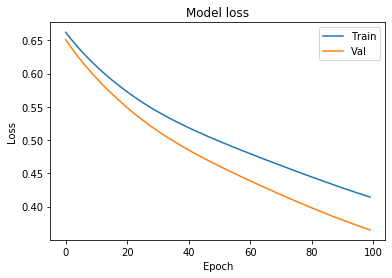

In [146]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [173]:
Y_pred = model.predict(X_test)

In [175]:
X_test.shape

(59, 6)

In [174]:
matrix = metrics.confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))
matrix

array([[23,  3,  0],
       [ 3, 24,  0],
       [ 1,  5,  0]])